David San<br>
Jacky Gnong

Where's Waldo Finder<br>
CS4662

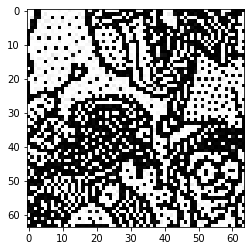

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

# Create reference to the folder of images
directory = "wheres-waldo/64-gray"

# Define the labels
categories = ['waldo', 'notwaldo']

for category in categories:  # our catagories are waldo and not waldo
    path = os.path.join(directory,category)  # create path to waldo and not waldo
    for img in os.listdir(path):  # iterate over each images
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [2]:
# Display the array of pixels from 0...255
print(img_array)

[[249 253   0 ...   0   2   2]
 [255 255   0 ...   0   7 253]
 [254 235  14 ...   0 255 253]
 ...
 [  5   4 255 ...   1   3 255]
 [255   0   0 ...   0 242   7]
 [  1   0   3 ...   0   7 250]]


In [3]:
# Print its shape
print(img_array.shape)

(64, 64)


In [4]:
training_data = []

def create_training_data():
    for category in categories:  

        path = os.path.join(directory,category)  # create path
        class_num = categories.index(category)  # get the classification  (0 or a 1). 0 = waldo 1 = notwaldo

        for img in tqdm(os.listdir(path)):  # iterate over each image
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                training_data.append([img_array, class_num])  # add this to our training_data
            except Exception as e:
                pass


create_training_data()

print(len(training_data))

100%|█████████████████████████████████████████████████████████████████████████████| 5338/5338 [00:05<00:00, 931.90it/s]

5376


In [5]:
import random

# Shuffle training data for randomness
random.shuffle(training_data)

# for sample in training_data[:10]:
#     print(sample[1])

In [6]:
X = []
y = []

size = 64

# Dataframes for features and labels
for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, size, size, 1))

X = np.array(X).reshape(-1, size, size, 1)
y = np.array(y)

[[[[  0]
   [250]
   [255]
   ...
   [  0]
   [255]
   [  4]]

  [[  7]
   [  0]
   [  7]
   ...
   [255]
   [  1]
   [  0]]

  [[  0]
   [  3]
   [  0]
   ...
   [255]
   [  0]
   [255]]

  ...

  [[  2]
   [255]
   [251]
   ...
   [255]
   [255]
   [246]]

  [[  0]
   [243]
   [255]
   ...
   [250]
   [253]
   [255]]

  [[  0]
   [255]
   [246]
   ...
   [255]
   [255]
   [251]]]]


In [7]:
# Pickle items for easier readability/writeability 
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [8]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

# Normalize the data
X = X/255.0

class_weight = {0: 38.,
                1: 5338.}

# Create a model for the CNN
model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

hist = model.fit(X, y, batch_size=32, epochs=3, validation_split=0.3, class_weight=class_weight)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train on 3763 samples, validate on 1613 samples
Epoch 1/3
3763/3763 [==============================] - 254s 67ms/sample - loss: 229.4369 - accuracy: 0.9819 - val_loss: 69.6117 - val_accuracy: 0.9944
Epoch 2/3
3763/3763 [==============================] - 242s 64ms/sample - loss: 69.4527 - accuracy: 0.9920 - val_loss: 106.7753 - val_accuracy: 0.9944
Epoch 3/3
3763/3763 [==============================] - 214s 57ms/sample - loss: 97.8146 - accuracy: 0.9923 - val_loss: 7.9055 - val_accuracy: 0.9944


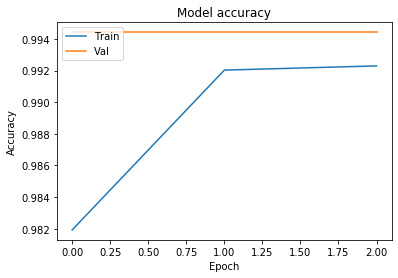

In [9]:
#Visualize the models accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

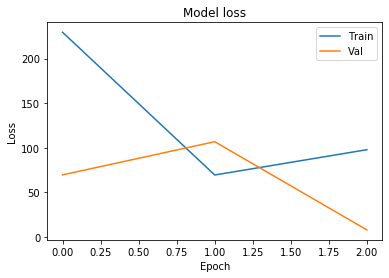

In [10]:
#Visualize the models loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [11]:
def prepare(filepath):
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)  # read in the image, convert to grayscale
    new_array = cv2.resize(img_array, (size, size))  # resize image to match model's expected sizing
    return new_array.reshape(-1, size, size, 1)  # return the image with shaping that TF wants.

In [12]:
prediction = model.predict([prepare("wheres-waldo/waldo_test.jpg")])
prediction

array([[1.]], dtype=float32)

In [13]:
# Print prediction
print(categories[int(prediction[0][0])])

notwaldo
